In [1]:
import requests
import zipfile
from pathlib import Path

In [2]:
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print('Directory already exists')
else:
  print("Creating image path")
  image_path.mkdir(parents = True, exist_ok=True)


Directory already exists


In [3]:
with open(data_path / 'pizza_stake_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  f.write(request.content)

with zipfile.ZipFile(data_path / 'pizza_stake_sushi.zip', 'r') as zip_ref:
  print('Unzipping data')
  zip_ref.extractall(image_path)

Unzipping data


In [4]:
import os
def walk_through_dir(dir_path):
  '''Walk through dir_path returning its contents'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [5]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

walk_through_dir(train_dir)
walk_through_dir(test_dir)

There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak


Image path: data/pizza_steak_sushi/train/pizza/393658.jpg
Image size: (512, 383)
Image class: pizza


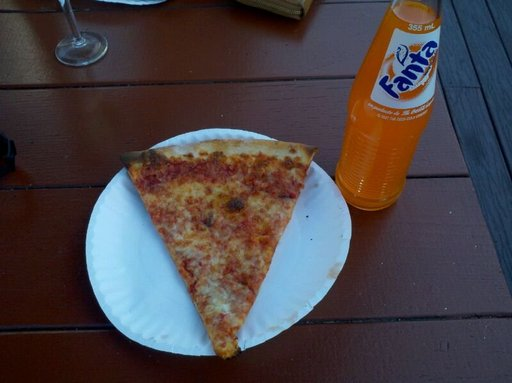

In [6]:
# Visualizing an image

import random
from PIL import Image

random.seed(42)

img_path_list = list(image_path.glob('*/*/*.jpg'))
img_path = random.choice(img_path_list)
img_class = img_path.parent.stem
img = Image.open(img_path)


print(f"Image path: {img_path}")
print(f"Image size: {img.size}")
print(f"Image class: {img_class}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(382.5), np.float64(-0.5))

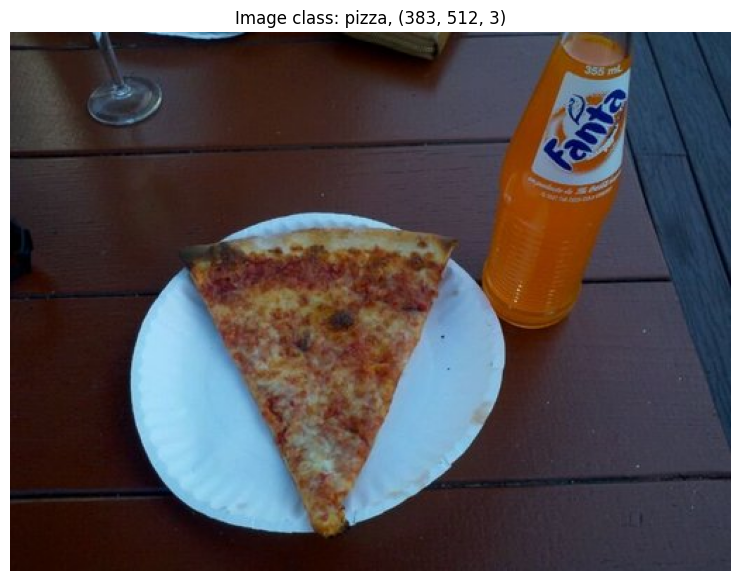

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {img_class}, {img_as_array.shape}')
plt.axis(False)

### Transforming the Data

In [8]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
# Write a transform for an image

data_transform = transforms.Compose([
  transforms.Resize((128,128)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

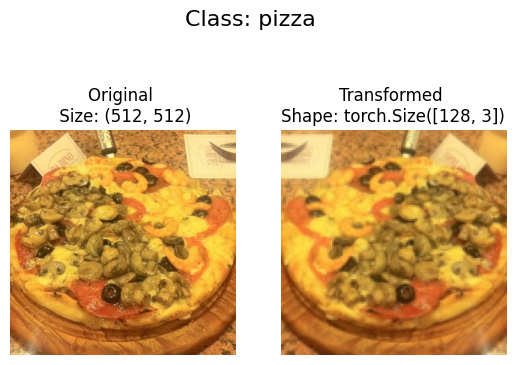

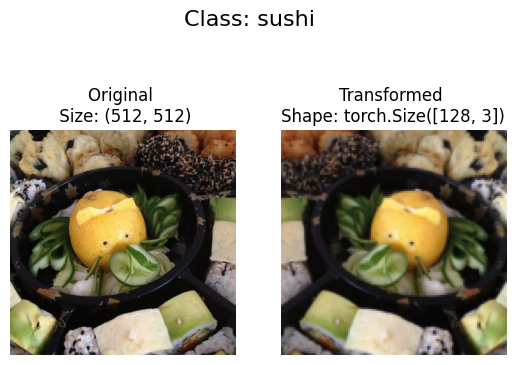

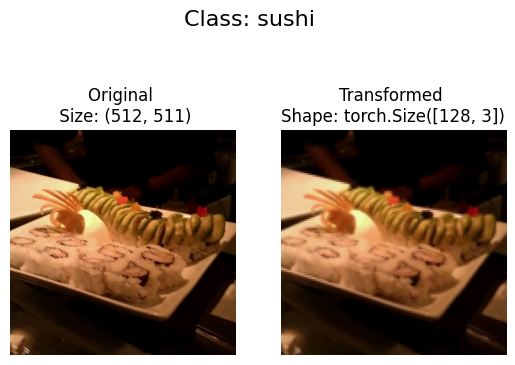

In [10]:
def plot_transformed_images(img_path_list, transform, n = 3, seed = 42):
  ''' Selects randomg images, transforms and plots them'''

  if seed:
    random.seed(seed)

  random_img_path = random.sample(img_path_list, k=n)
  for img_path in random_img_path:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \n Size: {f.size}')
      ax[0].axis('off')

      transformed_img = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f'Transformed \nShape: {transformed_img.shape[-2:]}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {img_path.parent.stem}', fontsize=16)

plot_transformed_images(img_path_list, data_transform, n=3, seed = None)

In [11]:
# Loading image data using ImageFolder

from torchvision import datasets

train_data = datasets.ImageFolder(train_dir,
                                  transform = data_transform,
                                  target_transform= None)
test_data = datasets.ImageFolder(test_dir,
                                 transform= data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [12]:
# Get class names as a list

class_names = train_data.classes
class_dict = train_data.class_to_idx
print(class_dict, class_names)


# Check the lenght of the dataset
len(train_data), len(test_data)

{'pizza': 0, 'steak': 1, 'sushi': 2} ['pizza', 'steak', 'sushi']


(225, 75)

In [13]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [14]:
img, label = train_data[0][0], train_data[0][1]

img, label

(tensor([[[0.1137, 0.1098, 0.1098,  ..., 0.1059, 0.1137, 0.1137],
          [0.1255, 0.1216, 0.1216,  ..., 0.1059, 0.1098, 0.1137],
          [0.1333, 0.1294, 0.1294,  ..., 0.1020, 0.1059, 0.1098],
          ...,
          [0.1765, 0.1686, 0.1647,  ..., 0.0902, 0.0863, 0.0824],
          [0.1765, 0.1686, 0.1647,  ..., 0.0824, 0.0863, 0.0902],
          [0.1608, 0.1569, 0.1569,  ..., 0.0824, 0.0824, 0.0863]],
 
         [[0.0588, 0.0549, 0.0549,  ..., 0.0706, 0.0745, 0.0706],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0667, 0.0627, 0.0627,  ..., 0.0745, 0.0745, 0.0745],
          ...,
          [0.2314, 0.2275, 0.2275,  ..., 0.1098, 0.1098, 0.1059],
          [0.2314, 0.2314, 0.2275,  ..., 0.1020, 0.1020, 0.1059],
          [0.2275, 0.2275, 0.2353,  ..., 0.0980, 0.0980, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0980, 0.0941],
          [0.0235, 0.0235, 0.0235,  ..., 0.0902, 0.0941, 0.0941],
          [0.0196, 0.0157, 0.0196,  ...,

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

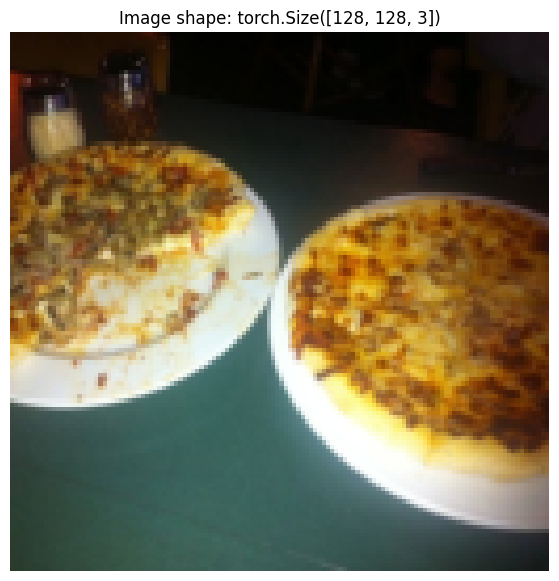

In [15]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f'Image shape: {img_permute.shape}')
plt.axis('off')

### Replicating the ImageFolder for custom dataset folder so that we can use dataloaders

In [16]:
import os
import pathlib
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from typing import Optional, Tuple, List, Dict

In [17]:
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [18]:
target_directory = train_dir
target_directory

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [19]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  '''Finds the class folder names in a target directory'''
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f'Could not find any classes in {directory}')
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx


find_classes(target_directory)


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [20]:
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir = str, transform = None):
    # Class attributes
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    '''Returns the total number of samples'''
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    '''Returns one sample of data, data and label(target)'''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform: # if transform exists return the tranformed image, otherwise the image itself
      return self.transform(img), class_idx
    else:
      return img, class_idx



In [21]:
train_transforms = transforms.Compose([
  transforms.Resize((128,128)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Resize((128,128)),
  transforms.ToTensor()
])

In [22]:
# Test out the custom function

train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform = test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7dde1b94f090>,
 <__main__.ImageFolderCustom at 0x7dde1b94fdd0>)

In [23]:
print(train_data.classes == train_data_custom.classes)
print(test_data.class_to_idx == test_data_custom.class_to_idx)
print(train_data.class_to_idx == train_data_custom.class_to_idx)

True
True
True


In [24]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False

  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize = (16,8))

  for i, targ_sample in enumerate(random_sample_idx):
    img, label = dataset[targ_sample][0], dataset[targ_sample][1]

    img_adjusted = img.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(img_adjusted)
    plt.title(f'Class: {classes[label]}')
    plt.axis('off')

    if classes:
      title = f'Class: {classes[label]}'

      if display_shape:
        title = title + f'\nShape: {img_adjusted.shape}'
      plt.title(title)



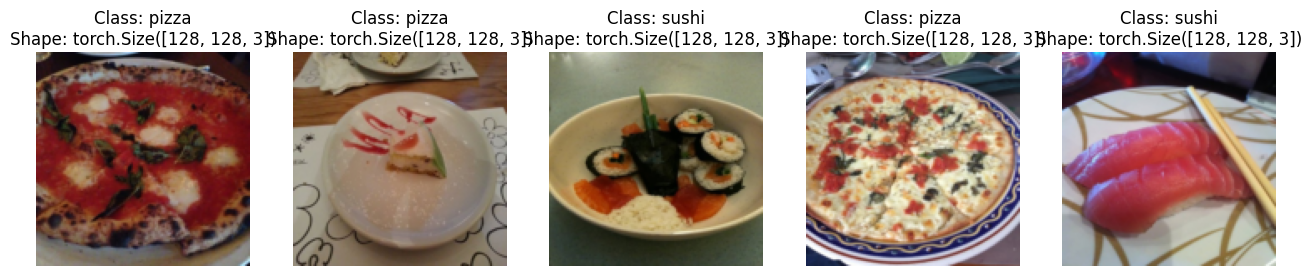

In [25]:
display_random_images(train_data, classes = train_data.classes, n=5)

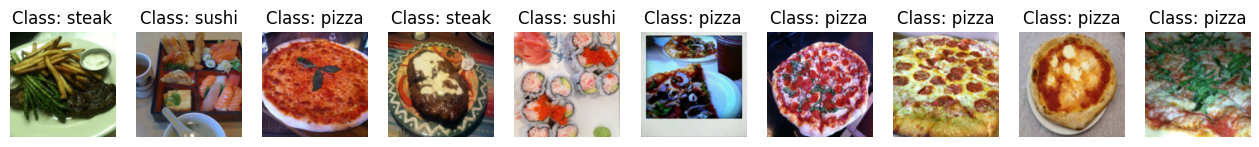

In [26]:
display_random_images(train_data_custom, classes = train_data_custom.classes, n=20)

### Turn custom loaded images into Dataloaders

In [27]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                             batch_size = BATCH_SIZE,
                             num_workers = NUM_WORKERS,
                             shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                             batch_size = BATCH_SIZE,
                             num_workers = NUM_WORKERS,
                             shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7dde1b707590>,
 <torch.utils.data.dataloader.DataLoader at 0x7dde1b2b3f50>)

In [28]:
img_custom , label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

### Other forms of transforms

In [29]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
     ])

test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [30]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2026009.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3860002.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2451169.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2924941.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/702165.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/300869.jpg')]

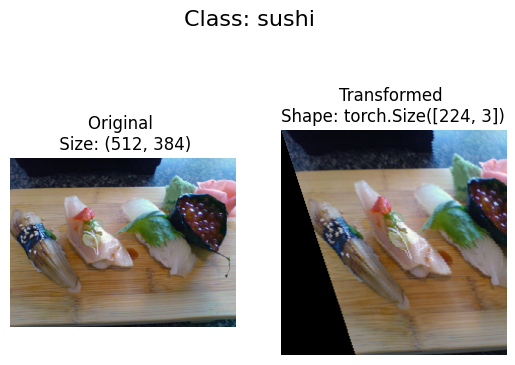

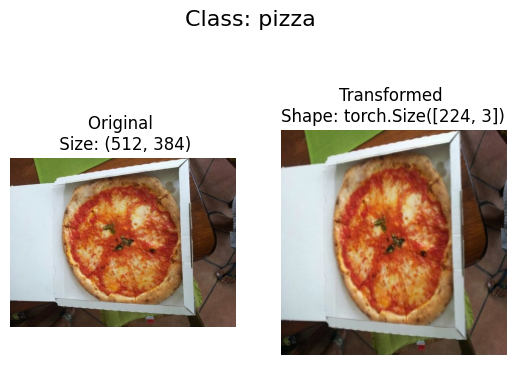

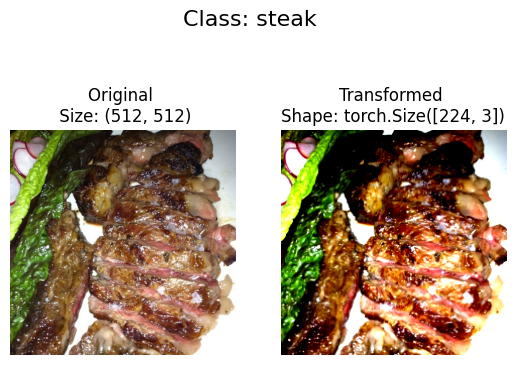

In [31]:
plot_transformed_images(image_path_list, train_transform, n=3, seed = None)

### Creating the Baseline Model

In [32]:
simple_transform = transforms.Compose([
  transforms.Resize((128,128)),
  transforms.ToTensor()
])

In [33]:
from torchvision import datasets

# Doing the data transformation
train_data_simple = datasets.ImageFolder(train_dir,
                                  transform = simple_transform,
                                  target_transform= None)

test_data_simple = datasets.ImageFolder(test_dir,
                                 transform= simple_transform)

# Turn the datasets into dataloaders

BATCH_SIZE = 64
train_data_loader_simple = DataLoader(dataset = train_data_simple,
                               batch_size = BATCH_SIZE,
                               num_workers = os.cpu_count(),
                               shuffle = True,
                               )

test_data_loader_simple = DataLoader(dataset = train_data_simple,
                               batch_size = BATCH_SIZE,
                               num_workers = os.cpu_count(),
                               shuffle = False,
                               )


In [34]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                      stride = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                      stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*29*29,
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [35]:
torch.manual_seed(42)

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 16,
                  output_shape = len(train_data_simple.classes)).to(device)
model_0

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13456, out_features=3, bias=True)
  )
)

In [36]:
image_batch, label_batch = next(iter(train_data_loader_simple))
image_batch.shape, label_batch.shape


model_0(image_batch.to(device))


tensor([[ 3.8253e-03,  3.2381e-02,  4.2337e-03],
        [-2.5560e-03,  3.4141e-02,  3.6319e-03],
        [ 4.5531e-03,  3.8579e-02,  6.7414e-03],
        [ 4.8132e-04,  3.3032e-02,  1.2170e-02],
        [ 4.4034e-03,  3.6953e-02,  9.6939e-03],
        [ 1.5370e-03,  2.9942e-02,  4.5566e-03],
        [ 2.1021e-03,  3.4516e-02,  7.3041e-03],
        [ 1.5190e-03,  3.7757e-02,  1.1769e-03],
        [ 2.8044e-03,  2.9154e-02,  1.0133e-02],
        [ 1.9958e-03,  3.7471e-02,  1.0239e-02],
        [ 1.2387e-03,  3.0953e-02,  8.5158e-03],
        [ 3.8553e-03,  3.1479e-02,  3.2956e-03],
        [ 1.2877e-03,  3.4854e-02,  2.3908e-03],
        [ 5.0135e-03,  3.5385e-02,  5.6632e-03],
        [ 1.3072e-03,  3.1790e-02,  6.7436e-03],
        [ 1.0640e-02,  3.6917e-02,  3.9747e-03],
        [ 2.3377e-03,  3.5526e-02,  6.7494e-03],
        [-2.1466e-04,  3.4806e-02,  6.3787e-03],
        [ 1.7478e-03,  3.0496e-02,  5.1473e-03],
        [ 1.0612e-03,  3.3365e-02,  8.0258e-03],
        [ 1.4871e-03

In [37]:
!pip install torchinfo

In [38]:
from torchinfo import summary

summary(model_0, input_size = (1,3,128,128))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 16, 62, 62]           --
│    └─Conv2d: 2-1                       [1, 16, 126, 126]         448
│    └─ReLU: 2-2                         [1, 16, 126, 126]         --
│    └─Conv2d: 2-3                       [1, 16, 124, 124]         2,320
│    └─ReLU: 2-4                         [1, 16, 124, 124]         --
│    └─MaxPool2d: 2-5                    [1, 16, 62, 62]           --
├─Sequential: 1-2                        [1, 16, 29, 29]           --
│    └─Conv2d: 2-6                       [1, 16, 60, 60]           2,320
│    └─ReLU: 2-7                         [1, 16, 60, 60]           --
│    └─Conv2d: 2-8                       [1, 16, 58, 58]           2,320
│    └─ReLU: 2-9                         [1, 16, 58, 58]           --
│    └─MaxPool2d: 2-10                   [1, 16, 29, 29]           --
├─Seq

In [39]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):

  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Calcualte the accuracy
    y_pred_classes = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_classes == y).sum().item()/len(y_pred)*100

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [40]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):

  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_logits.argmax(dim=1) == y).type(torch.float).sum().item()/len(test_pred_labels)*100

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc

In [41]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data,
          test_dataloader: torch.utils.data,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):

  results = {
      'train_loss': [],
      'train_acc': [],
      'test_loss': [],
      'test_acc': []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)

    print(f'Epoch: {epoch+1} | '
          f'train_loss: {train_loss:.4f} | '
          f'train_acc: {train_acc:.4f} | '
          f'test_loss: {test_loss:.4f} | '
          f'test_acc: {test_acc:.4f}')

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units= 32,
                  output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.0005)

loss_fn = nn.CrossEntropyLoss()

start_time = timer()

results = train(model = model_0,
                train_dataloader = train_data_loader_simple,
                test_dataloader = test_data_loader_simple,
                optimizer = optimizer,
                loss_fn = loss_fn,
                epochs = 30)

end_time = timer()

print(f'Total training time: {end_time - start_time}')


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1091 | train_acc: 36.8016 | test_loss: 1.1009 | test_acc: 30.4688
Epoch: 2 | train_loss: 1.0908 | train_acc: 35.2391 | test_loss: 1.0862 | test_acc: 30.4688
Epoch: 3 | train_loss: 1.0812 | train_acc: 37.5829 | test_loss: 1.0681 | test_acc: 35.4522
Epoch: 4 | train_loss: 1.0582 | train_acc: 42.6136 | test_loss: 1.0377 | test_acc: 50.5919
Epoch: 5 | train_loss: 1.0141 | train_acc: 56.9957 | test_loss: 0.9869 | test_acc: 49.4673
Epoch: 6 | train_loss: 0.9436 | train_acc: 60.3693 | test_loss: 0.9027 | test_acc: 60.2154
Epoch: 7 | train_loss: 0.8610 | train_acc: 62.4171 | test_loss: 0.8096 | test_acc: 66.6903
Epoch: 8 | train_loss: 0.7963 | train_acc: 68.1818 | test_loss: 0.7484 | test_acc: 70.1349
Epoch: 9 | train_loss: 0.7822 | train_acc: 67.8385 | test_loss: 0.7544 | test_acc: 65.1989
Epoch: 10 | train_loss: 0.7109 | train_acc: 67.8149 | test_loss: 0.7080 | test_acc: 68.0871
Epoch: 11 | train_loss: 0.6876 | train_acc: 73.5795 | test_loss: 0.6573 | test_acc: 72.86

In [43]:
results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

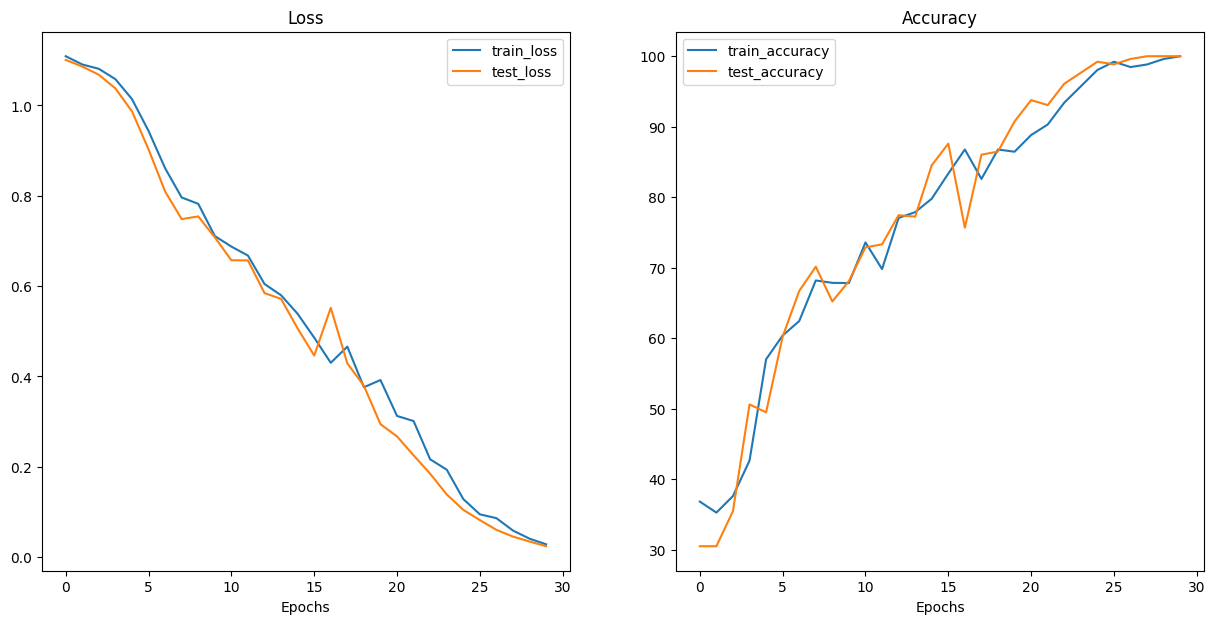

In [44]:
def plot_loss_curves(results):
  loss = torch.tensor(results['train_loss']).cpu()
  test_loss = torch.tensor(results['test_loss']).cpu()

  accuracy = torch.tensor(results['train_acc']).cpu()
  test_accuracy = torch.tensor(results['test_acc']).cpu()

  epochs = range(len(results['train_loss']))

  plt.figure(figsize = (15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label = 'train_loss')
  plt.plot(epochs, test_loss, label = 'test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label = 'train_accuracy')
  plt.plot(epochs, test_accuracy, label = 'test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

plot_loss_curves(results)

In [45]:
import requests
from pathlib import Path

def pred_and_plot_image(model: nn.Module,
                        image_path: str,
                        class_names: list[str],
                        transform: torchvision.transforms = None,
                        device=device):

  '''Makes a prediction on a target image with a trained model and plots the image and prediction'''

  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)/255.

  if tranform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image_transform = target_image.unsqueeze(dim=0)
    target_image_pred = model(target_image_transform.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.imshow(target_image.permute(1,2,0))